# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [62]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

** Read in the csv file as a dataframe called df **

In [64]:
df=pd.read_csv('Datasets/911.csv')

** Check the info() of the df **

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


** Check the head of df **

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [67]:
topzip=df['zip'].value_counts()
topzip.head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [68]:
toptowns=df['twp'].value_counts()
toptowns.head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [69]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [70]:
df['title'].nunique()

141

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [71]:
x=df['title'].iloc[0]
x.split(":")[0]

'EMS'

In [72]:
df['Reason']=df['title'].apply(lambda title: title.split(":")[0])

In [73]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic


** What is the most common Reason for a 911 call based off of this new column? **

In [74]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

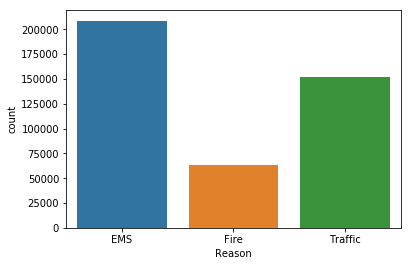

In [75]:
import seaborn as sns
# sns.countplot()
sns.countplot(x='Reason',data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [76]:
df.iloc[2]

lat                                                    40.1212
lng                                                    -75.352
desc         HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...
zip                                                      19401
title                                      Fire: GAS-ODOR/LEAK
timeStamp                                  2015-12-10 14:39:21
twp                                                 NORRISTOWN
addr                                                  HAWS AVE
e                                                            1
Reason                                                    Fire
Name: 2, dtype: object

In [77]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [78]:
type(df['timeStamp'].iloc[0])

str

In [79]:
# df['timeStamp']g
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [80]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [81]:
time = df['timeStamp'].iloc[3]
# time.hour
# time.day
# time.year
# time.dayofweek

In [82]:
Dw=df['timeStamp'].apply(lambda time: time.dayofweek)
# Dw.map(dmap,na_action='ignore')
# Day_of_week
hour=df['timeStamp'].apply(lambda hr: hr.hour)
month=df['timeStamp'].apply(lambda m:m.month)

In [83]:
df['Day_of_week']=Dw
df['Hour']=hour
df['Month']=month

In [84]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_week,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,3,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,3,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,3,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,3,16,12
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,3,15,12
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,3,16,12
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,3,16,12
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,3,16,12
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,3,17,12


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [85]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [86]:
df['Day_of_week']=df['Day_of_week'].map(dmap,na_action='ignore')

# if na_action is set to ignore, it ignores NaN values from being passed to the map()

In [87]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_week,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,16,12


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [88]:
df['Day_of_week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
5         Thu
6         Thu
7         Thu
8         Thu
9         Thu
10        Thu
11        Thu
12        Thu
13        Thu
14        Thu
15        Thu
16        Thu
17        Thu
18        Thu
19        Thu
20        Thu
21        Thu
22        Thu
23        Thu
24        Thu
25        Thu
26        Thu
27        Thu
28        Thu
29        Thu
         ... 
423879    Fri
423880    Fri
423881    Fri
423882    Fri
423883    Fri
423884    Fri
423885    Fri
423886    Fri
423887    Fri
423888    Fri
423889    Fri
423890    Fri
423891    Fri
423892    Fri
423893    Fri
423894    Fri
423895    Fri
423896    Fri
423897    Fri
423898    Fri
423899    Fri
423900    Fri
423901    Fri
423902    Fri
423903    Fri
423904    Fri
423905    Fri
423906    Fri
423907    Fri
423908    Fri
Name: Day_of_week, Length: 423909, dtype: object

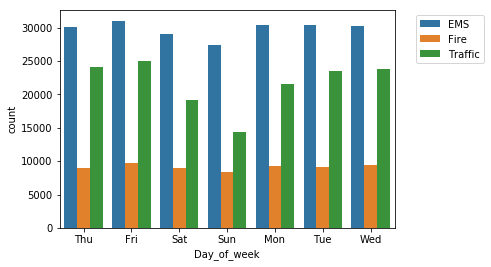

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Day_of_week',hue='Reason',data=df)
# to place legen outside the plot,
# use the bbox_to_anchor keyword argument we can shift the
# legend slightly outside the axes boundaries

plt.legend(bbox_to_anchor=(1.05,1))

**Now do the same for Month:**

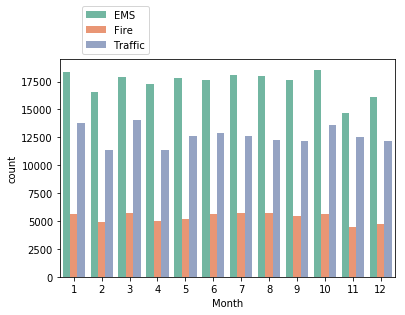

In [90]:
sns.countplot(x='Month',hue='Reason',data=df,palette='Set2')
plt.legend(bbox_to_anchor=(.05,1))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [91]:
bymonth=df.groupby(by='Month').count()

In [111]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_week,Hour
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

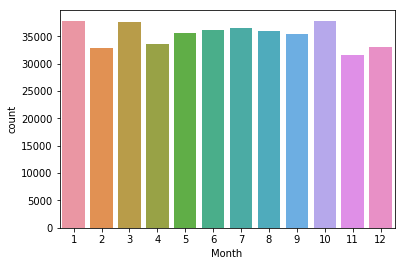

In [93]:
sns.countplot(x='Month',data=df)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [94]:
df.reset_index(inplace=True,drop=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_week,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,16,12


** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

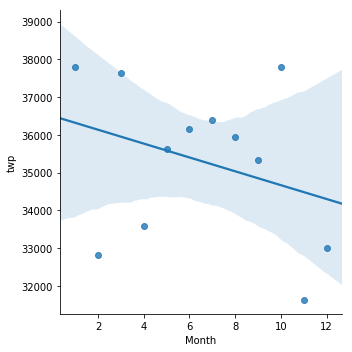

In [113]:
sns.lmplot(data=bymonth.reset_index(),x='Month',y='twp')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [96]:
type(df['timeStamp'].iloc[2])
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [97]:
Date=df['timeStamp'].apply(lambda x: x.date())
df['Date']=Date
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day_of_week,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,17,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,17,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu,14,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,16,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,16,12,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,Thu,15,12,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,Thu,16,12,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,Thu,16,12,2015-12-10
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,Thu,16,12,2015-12-10
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,Thu,17,12,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [123]:
df.groupby('Date').count()['zip']

Date
2015-12-10     100
2015-12-11     332
2015-12-12     334
2015-12-13     279
2015-12-14     386
2015-12-15     380
2015-12-16     343
2015-12-17     336
2015-12-18     306
2015-12-19     239
2015-12-20     236
2015-12-21     376
2015-12-22     399
2015-12-23     430
2015-12-24     387
2015-12-25     266
2015-12-26     258
2015-12-27     290
2015-12-28     337
2015-12-29     315
2015-12-30     305
2015-12-31     268
2016-01-01     236
2016-01-02     300
2016-01-03     284
2016-01-04     345
2016-01-05     373
2016-01-06     375
2016-01-07     334
2016-01-08     326
              ... 
2018-10-18     367
2018-10-19     341
2018-10-20     360
2018-10-21     283
2018-10-22     377
2018-10-23     385
2018-10-24     354
2018-10-25     370
2018-10-26     391
2018-10-27     397
2018-10-28     269
2018-10-29     383
2018-10-30     384
2018-10-31     440
2018-11-01     325
2018-11-02     482
2018-11-03     562
2018-11-04     281
2018-11-05     401
2018-11-06     441
2018-11-07     389
2018-11

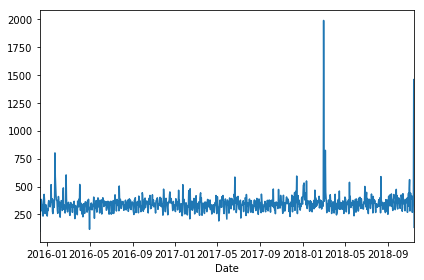

In [124]:
dategrp=df.groupby(by='Date').count()['zip']
# sns.countplot(df['Date'],data=df)
dategrp.plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'EMS')

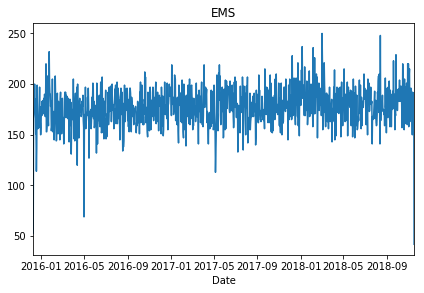

In [131]:
df[df['Reason']=='EMS'].groupby('Date').count()['zip'].plot()
plt.tight_layout()
plt.title('EMS')

Text(0.5, 1.0, 'Traffic')

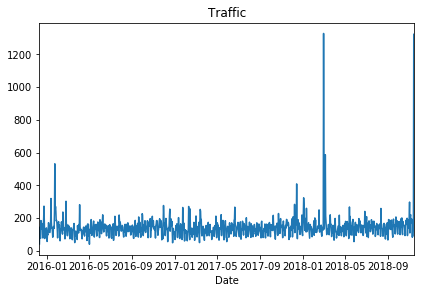

In [134]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [140]:
dayhr=df.groupby(by=['Day_of_week','Hour']).count()['Reason'].unstack()

** Now create a HeatMap using this new DataFrame. **

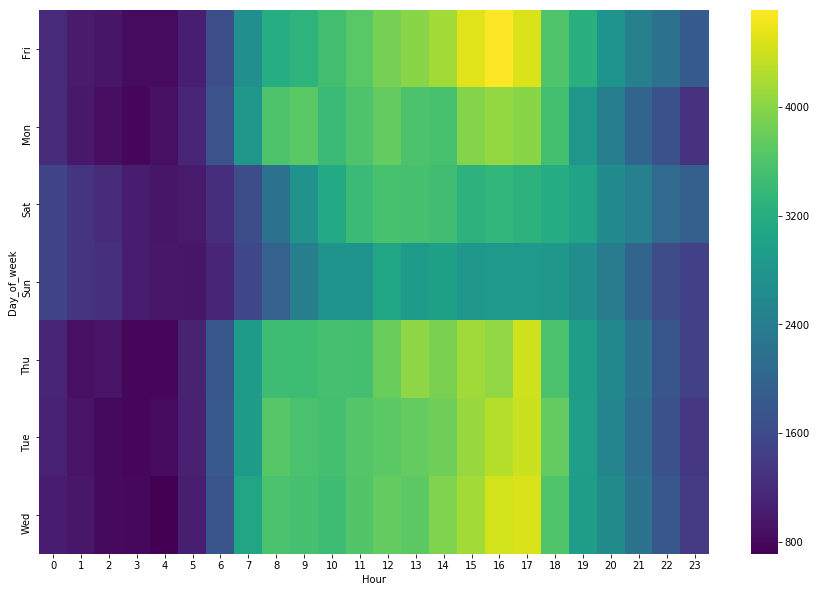

In [144]:
# make the plot bigger
plt.figure(figsize=[15,10])
sns.heatmap(dayhr,cmap='viridis',)

** Now create a clustermap using this DataFrame. **

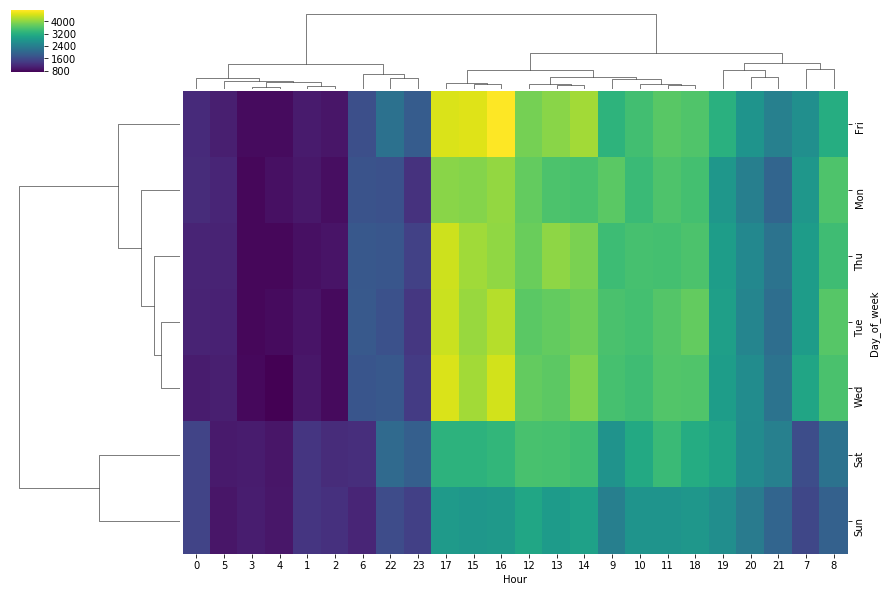

In [146]:
sns.clustermap(dayhr,figsize=[15,10],cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [156]:
daymonth=df.groupby(['Day_of_week','Month']).count()['Reason'].unstack()

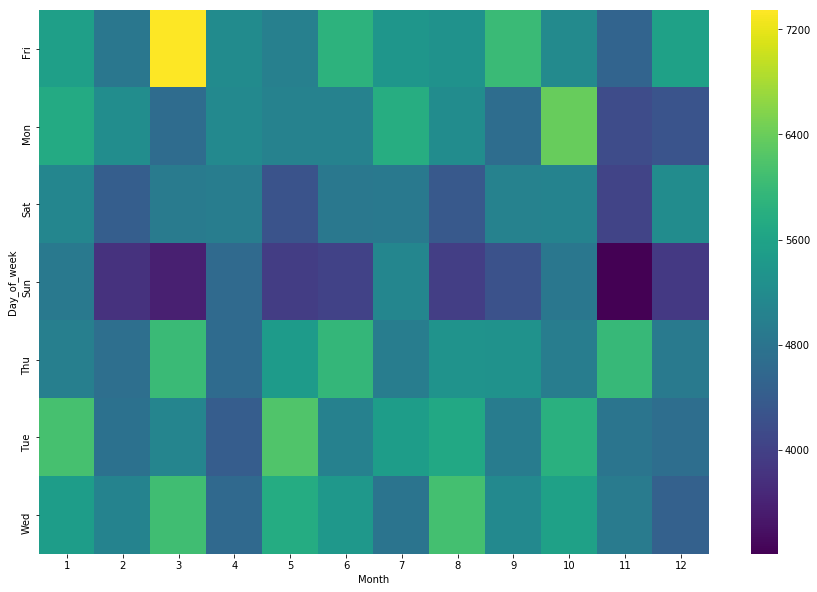

In [159]:
plt.figure(figsize=[15,10])
sns.heatmap(daymonth,cmap='viridis')


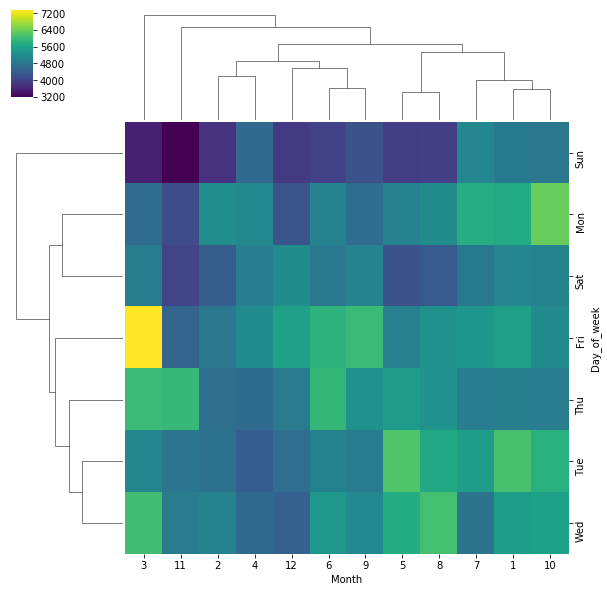

In [161]:
sns.clustermap(daymonth,cmap='viridis')

**Continue exploring the Data however you see fit!**
# Great Job!